In [20]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas.io.data import DataReader
from datetime import datetime
from __future__ import division

In [21]:
stock_list = ['FB', 'TWTR', 'LNKD']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in stock_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

### Basic Analysis of Stocks

In [22]:
FB.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,74.837302,75.644405,74.060198,74.868571,3.276372e+07,74.868571
std,6.059068,6.024937,6.031930,5.981691,1.528355e+07,5.981691
min,57.890000,58.450000,57.310000,57.920000,7.685500e+06,57.920000
25%,73.505000,74.232500,72.745000,73.492500,2.214475e+07,73.492500
50%,76.105000,76.920000,75.155000,76.095000,2.910145e+07,76.095000
75%,78.512500,79.252500,77.872500,78.517500,3.924050e+07,78.517500
max,85.500000,86.070000,84.520000,85.310000,1.241680e+08,85.310000


In [23]:
TWTR.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,43.188929,43.927857,42.381349,43.114325,2.470749e+07,43.114325
std,6.297570,6.371034,6.216051,6.275781,1.530685e+07,6.275781
min,30.940000,31.200000,30.380000,30.500000,6.254200e+06,30.500000
25%,38.067500,38.737500,37.357500,37.840000,1.578292e+07,37.840000
50%,41.990000,42.655000,40.620000,41.755000,2.094055e+07,41.755000
75%,49.030000,50.202500,48.252500,48.847500,2.765830e+07,48.847500
max,55.290000,55.990000,54.920000,55.420000,1.204886e+08,55.420000


In [24]:
LNKD.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-05-13,152.70,153.22000,146.38000,147.67,2477000,147.67
2014-05-14,147.06,148.81000,145.14999,145.56,2396500,145.56
2014-05-15,146.00,149.46001,143.45000,147.86,2893200,147.86
2014-05-16,145.20,147.32001,143.11000,147.02,2444900,147.02
2014-05-19,145.80,151.95000,145.55000,151.44,2219500,151.44


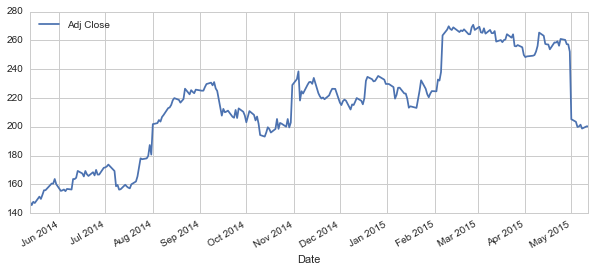

In [25]:
LNKD['Adj Close'].plot(legend=True,figsize=(10,4))

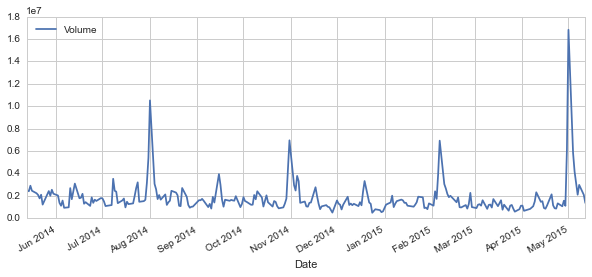

In [26]:
LNKD['Volume'].plot(legend=True,figsize=(10,4))

In [27]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    LNKD[column_name] = pd.rolling_mean(LNKD['Adj Close'],ma)

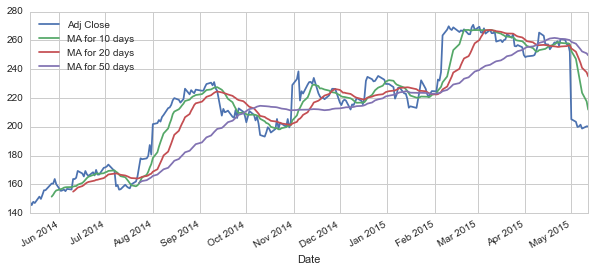

In [28]:
LNKD[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(10,4))

### Daily Return Analysis

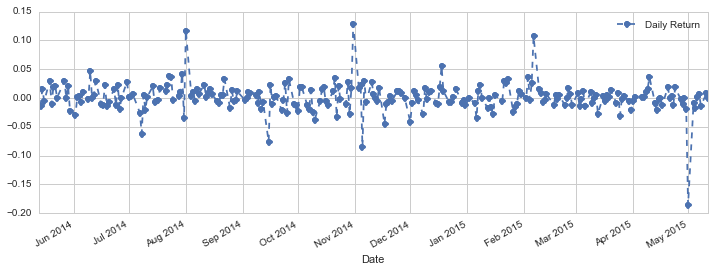

In [29]:
FB['Daily Return'] = LNKD['Adj Close'].pct_change()

FB['Daily Return'].plot(legend=True, linestyle= '--',marker='o',figsize=(12,4))

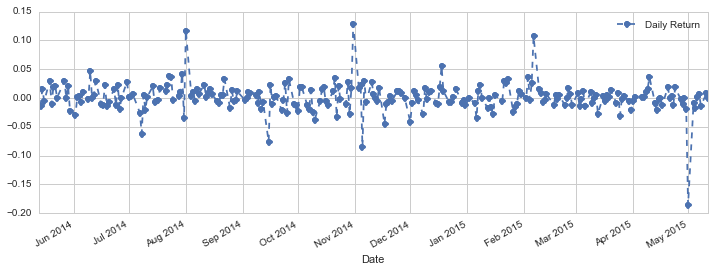

In [30]:
TWTR['Daily Return'] = LNKD['Adj Close'].pct_change()

TWTR['Daily Return'].plot(legend=True, linestyle= '--',marker='o',figsize=(12,4))

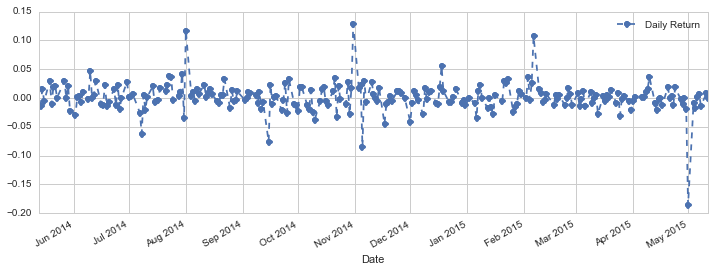

In [31]:
LNKD['Daily Return'] = LNKD['Adj Close'].pct_change()

LNKD['Daily Return'].plot(legend=True, linestyle= '--',marker='o',figsize=(12,4))

(-0.1, 0.1)

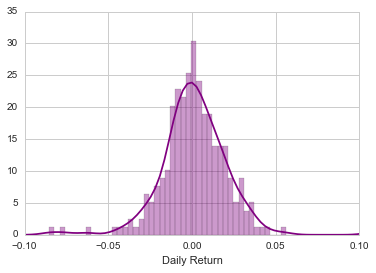

In [32]:
sns.distplot(LNKD['Daily Return'].dropna(),bins = 100, color = 'purple')
plt.xlim(-0.1,0.1)


In [33]:
closing_df = DataReader(['FB','TWTR','LNKD'],'yahoo',start,end)['Adj Close']

In [34]:
closing_df.head()

,FB,LNKD,TWTR
Date,,,
2014-05-13,59.83,147.67,33.39
2014-05-14,59.23,145.56,32.85
2014-05-15,57.92,147.86,32.77
2014-05-16,58.02,147.02,32.26
2014-05-19,59.21,151.44,32.07


In [35]:
returns = closing_df.pct_change()

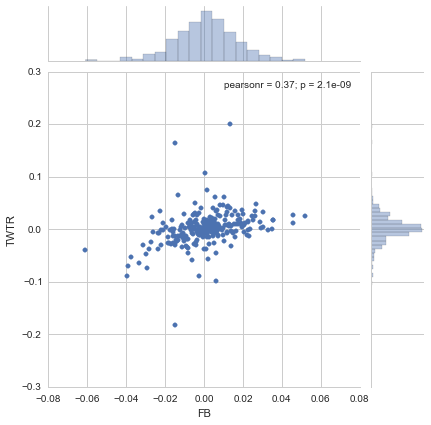

In [36]:
sns.jointplot('FB','TWTR',returns,kind='scatter')

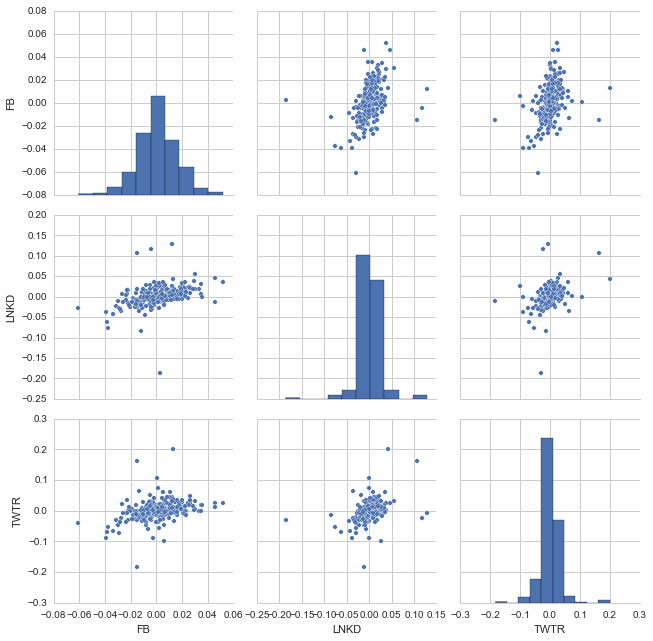

In [37]:
sns.pairplot(returns.dropna())

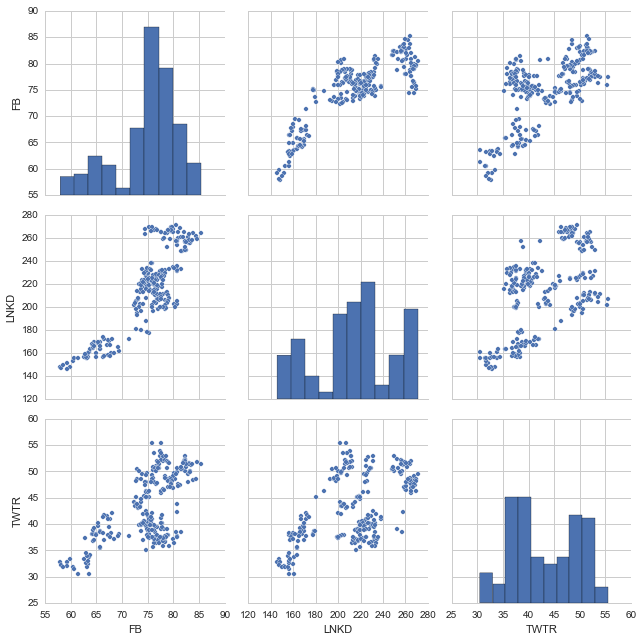

In [38]:
sns.pairplot(closing_df.dropna())

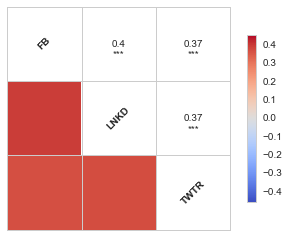

In [39]:
sns.corrplot(returns.dropna(),annot=True)

###Risk Analysis

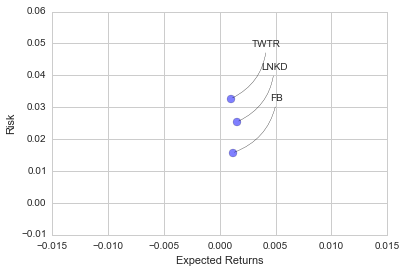

In [40]:
rets = returns.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),alpha = 0.5, s = area)

#plt.ylim([0.0,0.1])
#plt.xlim([-0.003,0.004])

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

for label, x, y, in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label,xy = (x,y), xytext = (50,50), textcoords = 'offset points', ha = 'right', va = 'bottom', 
                 arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad = -0.3'))

### Value at risk using the "bootstrap" method

#### Value at risk: the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. 

In [41]:
var_LNKD = rets['LNKD'].quantile(0.05)

print "Our one-day 5 percent VaR with the LNKD stock is %.5f " %var_LNKD

Our one-day 5 percent VaR with the LNKD stock is -0.02839 


#### The 0.05 empirical quantile of daily returns is at -0.0287. That means that with 95% confidence, our worst daily loss will not exceed 2.9%. So, if we have a million dollar investment, our one-day 5% VaR is 0.029*1,000,000 = $29,000.

In [42]:
var_FB = rets['FB'].quantile(0.05)

print "Our one-day 5 percent VaR with the FB stock is %.5f " %var_FB

Our one-day 5 percent VaR with the FB stock is -0.02372 


In [43]:
var_TWTR = rets['TWTR'].quantile(0.05)

print "Our one-day 5 percent VaR with the TWTR stock is %.5f " %var_TWTR

Our one-day 5 percent VaR with the TWTR stock is -0.04215 


###I would invest in FB since it has the lowest VaR!

Note: This might change depending on the date that you are running this analysis! 